# Question

income prices to airline

Airline prices books based on any feature?

How does the ticket price vary between Economy and Business class?

How does the ticket price vary days_left?

How does the ticket price vary stop_days?

How does the ticket price vary between source and destionation?

How does the ticket price vary between arrival and departure_time ?

Does ticket price change based on the duration?

# DATA COLLECTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website. from the website Easemytrip for flight travel between India's top 6 metro cities. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.

## Feature
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

# import library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

data is not null

## Cleaning Data

In [5]:
df = data.copy()

In [6]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
df=df.drop("Unnamed: 0", axis = 1)

## Information from data

In [8]:
for col in list(df.columns):
    print("\nfor column : ", col,"\n")
    print(df[col].value_counts())


for column :  airline 

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

for column :  flight 

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

for column :  source_city 

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

for column :  departure_time 

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

for column :  stops 

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

for column :  arrival_time 

Night            91538
Evening          78323
Morning        

In [9]:
z=pd.DataFrame(df["airline"]).drop_duplicates('airline')
z

,airline
0,SpiceJet
2,AirAsia
3,Vistara
8,GO_FIRST
12,Indigo
16,Air_India


In [10]:
pd.DataFrame(df["flight"]).drop_duplicates('flight')

,flight
0,SG-8709
1,SG-8157
2,I5-764
3,UK-995
4,UK-963
...,...
206278,6E-7141
206279,6E-557
206345,6E-7127
206358,6E-7259


In [11]:
pd.DataFrame(df["source_city"]).drop_duplicates('source_city')

,source_city
0,Delhi
43027,Mumbai
84065,Bangalore
119685,Kolkata
152559,Hyderabad
180495,Chennai


In [12]:
pd.DataFrame(df["stops"]).drop_duplicates('stops')

,stops
0,zero
18,one
175,two_or_more


In [13]:
pd.DataFrame(df["departure_time"]).drop_duplicates('departure_time')

,departure_time
0,Evening
1,Early_Morning
3,Morning
7,Afternoon
40,Night
1671,Late_Night


In [14]:
pd.DataFrame(df["days_left"]).drop_duplicates('days_left')

,days_left
0,1
118,2
251,3
398,4
563,5
738,6
919,7
1104,8
1286,9
1462,10


### info to business_class

In [15]:
pd.DataFrame(df["class"]).drop_duplicates('class')

,class
0,Economy
206666,Business


In [16]:
bus=pd.read_csv("/kaggle/input/flight-price-prediction/business.csv")

In [17]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [18]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [19]:
pd.DataFrame(bus["ch_code"]).drop_duplicates("ch_code")

,ch_code
0,AI
5,UK


In [20]:
pd.DataFrame(bus["time_taken"]).drop_duplicates("time_taken")

,time_taken
0,02h 00m
1,02h 15m
2,24h 45m
3,26h 30m
4,06h 40m
...,...
80762,31h 35m
86940,45h 50m
89074,34h 30m
89286,34h 00m


In [21]:
bus["price"].agg(["min" , 'max'])

min    1,00,111
max      99,680
Name: price, dtype: object

### info to Economy_class

In [22]:
eco=pd.read_csv("/kaggle/input/flight-price-prediction/economy.csv")

In [23]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [24]:
eco.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [25]:
pd.DataFrame(eco["ch_code"]).drop_duplicates("ch_code")

,ch_code
0,SG
2,I5
3,UK
8,G8
12,6E
16,AI
71637,2T
109730,S5


In [26]:
eco["price"].agg(["min" , 'max'])

min    1,105
max    9,999
Name: price, dtype: object

# Data visualization


In [27]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [29]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


### Q1: income prices to airline

In [30]:
df.groupby(["airline"]).sum().sort_values("price",ascending=False)[["price"]]

/tmp/ipykernel_20/3635582149.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["airline"]).sum().sort_values("price",ascending=False)[["price"]]


,price
airline,
Vistara,3886470735
Air_India,1901529790
Indigo,229580207
GO_FIRST,130973972
AirAsia,65858089
SpiceJet,55681482


/tmp/ipykernel_20/2560372366.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["airline"]).sum()[["price"]].plot.bar()


<Axes: xlabel='airline'>

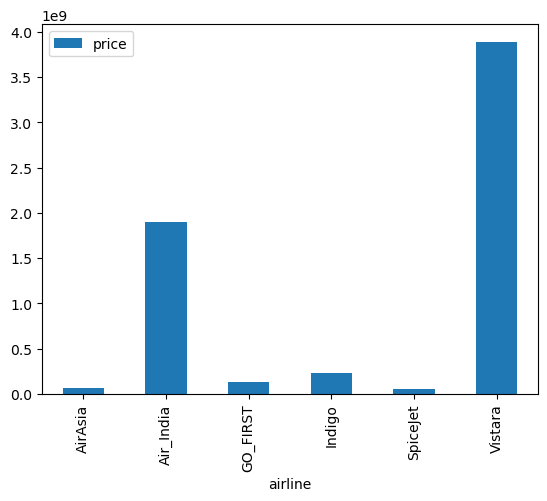

In [31]:
df.groupby(["airline"]).sum()[["price"]].plot.bar()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


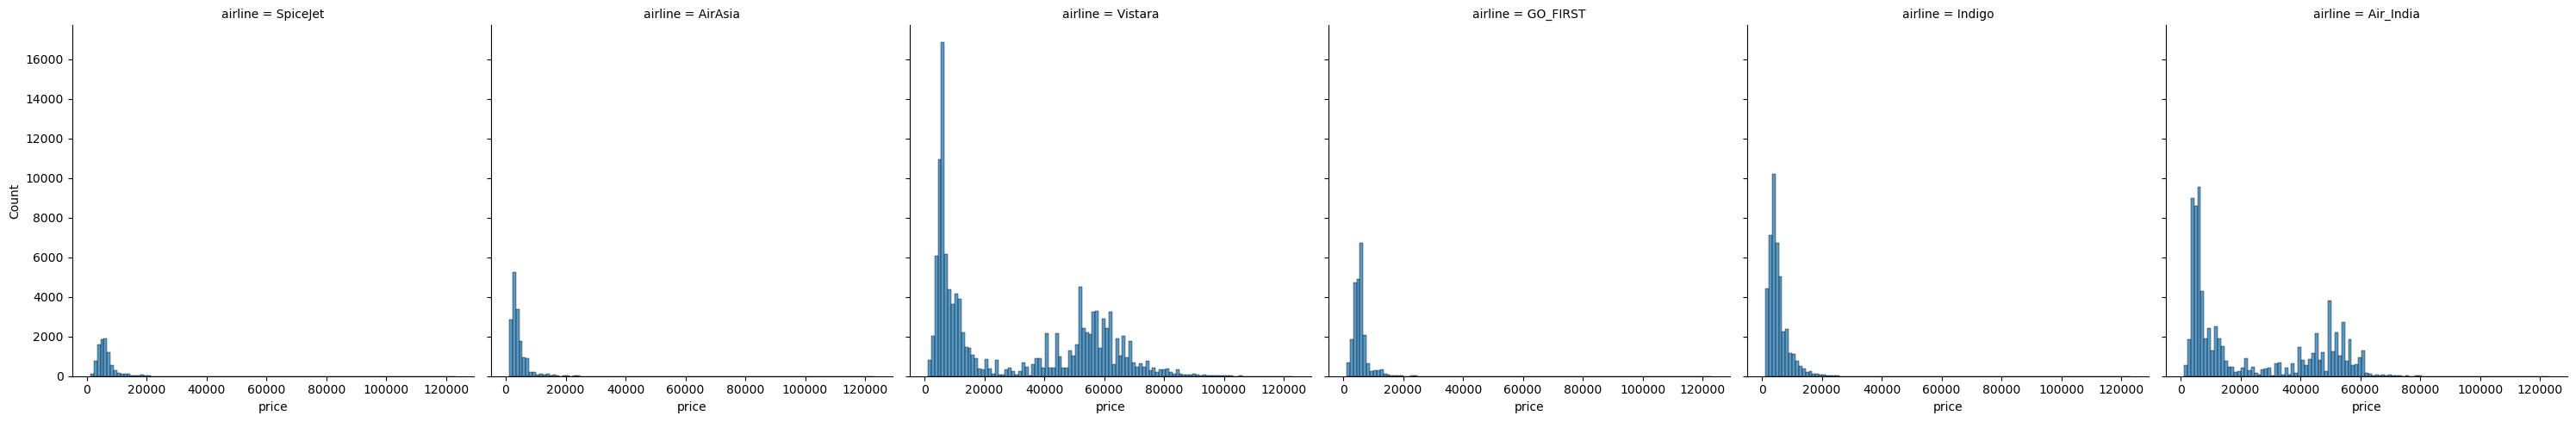

In [32]:
sns.displot(data=df, x="price", col="airline")

`Vistara` The largest airline in the source of income



## Q2:Airline prices books based on any feature


In [33]:
df.groupby(["airline"]).sum().sort_values("duration",ascending=False)[["duration"]]

/tmp/ipykernel_20/304793965.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["airline"]).sum().sort_values("duration",ascending=False)[["duration"]]


,duration
airline,
Vistara,1703930.16
Air_India,1254168.60
Indigo,249888.88
GO_FIRST,202888.42
AirAsia,143943.72
SpiceJet,113356.28


In [34]:
bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [35]:
eco.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


### Q3: How does the ticket price vary between Economy and Business class?

In [36]:
bus["price"].agg(["min" , 'max'])

min    1,00,111
max      99,680
Name: price, dtype: object

In [37]:
eco["price"].agg(["min" , 'max'])

min    1,105
max    9,999
Name: price, dtype: object

``1-Class affect price ``
Business_Class are the largest the economy_Class in prices

### Q4:How does the ticket price vary days_left


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


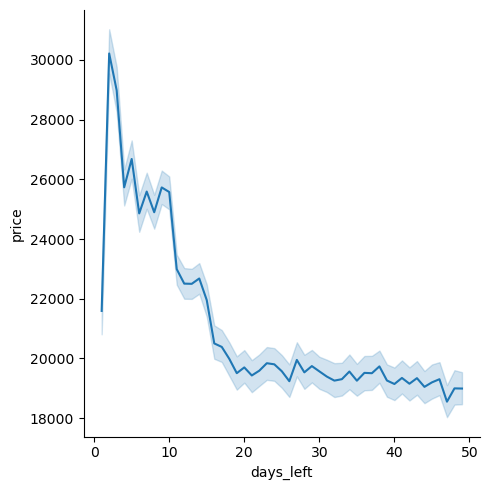

In [38]:
sns.relplot(
    data=df, kind="line",
    x="days_left", y="price"
)

In [39]:
df.groupby(["days_left"]).mean().sort_values("days_left",ascending=True)[["price"]][:10]

/tmp/ipykernel_20/1055346600.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["days_left"]).mean().sort_values("days_left",ascending=True)[["price"]][:10]


,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


``2-days_left is not affect prices`` some days between 10 to 20 day Cheaper from days 1 to 9

### Q5: How does the ticket price vary stop_days?

In [40]:
df.groupby(["stops"]).mean().sort_values("price",ascending=False)[["price"]]

/tmp/ipykernel_20/2517235187.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["stops"]).mean().sort_values("price",ascending=False)[["price"]]


,price
stops,
one,22900.992482
two_or_more,14113.450775
zero,9375.938535


<Axes: xlabel='stops'>

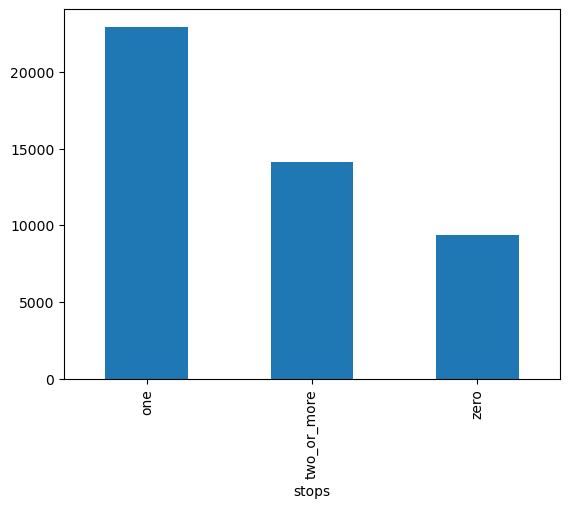

In [41]:
df.groupby("stops")['price'].mean().plot.bar()


``3-Stops is affect price`` price one > (zero) and (two or more)

### Q6:How does the ticket price vary between source and destionation?

In [42]:
df.groupby("destination_city")['price'].sum().sort_values(ascending=False)

destination_city
Mumbai       1263052374
Bangalore    1102760134
Kolkata      1087744724
Delhi        1057533005
Chennai       886211782
Hyderabad     872792256
Name: price, dtype: int64

<Axes: xlabel='destination_city', ylabel='price'>

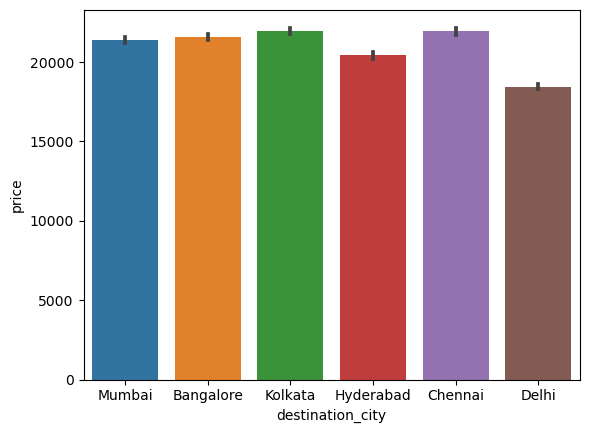

In [43]:
sns.barplot(x='destination_city',y='price',data=df)

<Axes: xlabel='source_city', ylabel='price'>

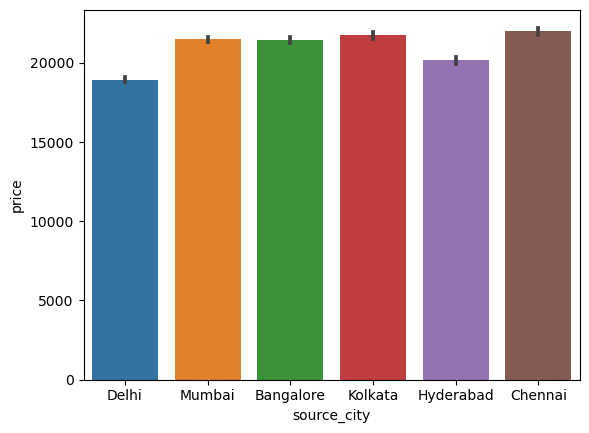

In [44]:
sns.barplot(x='source_city',y='price',data=df)


```4-Source and destination``` affect prices

### Q7:How does the ticket price vary between arrival  and departure_time	?

<Axes: xlabel='arrival_time', ylabel='price'>

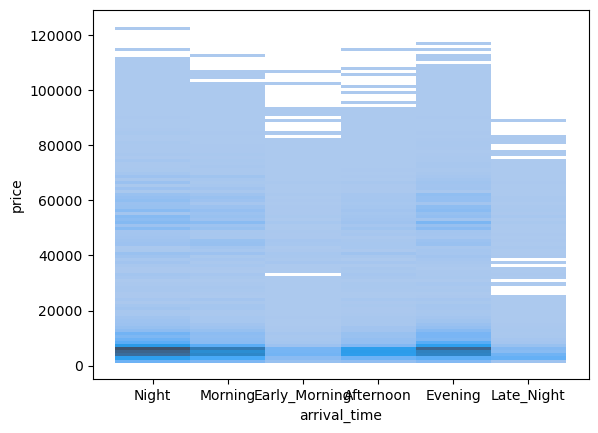

In [45]:
sns.histplot(data=df, x="arrival_time",y="price")


<Axes: xlabel='arrival_time'>

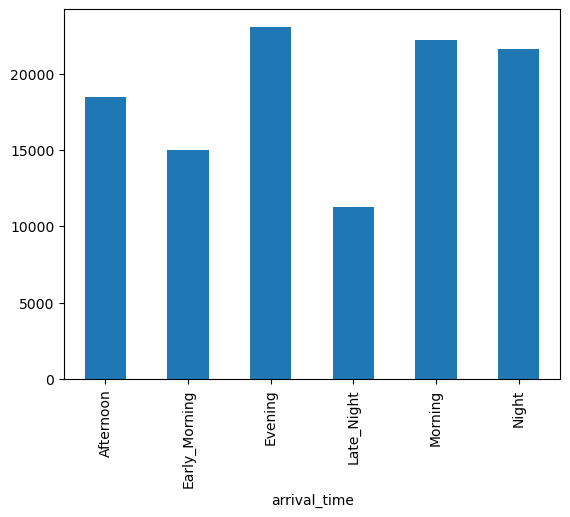

In [46]:
df.groupby("arrival_time")['price'].mean().plot.bar()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


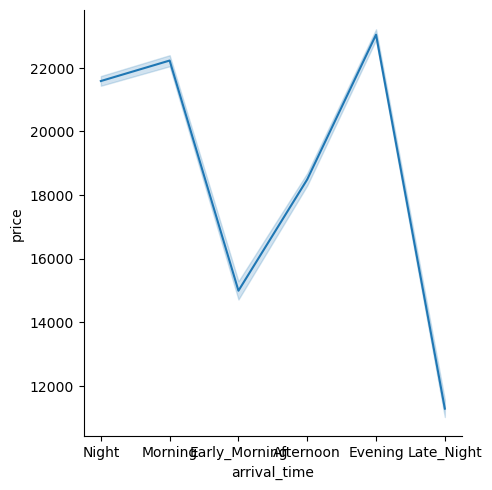

In [47]:
sns.relplot(
    data=df, kind="line",
    x="arrival_time", y="price"
)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


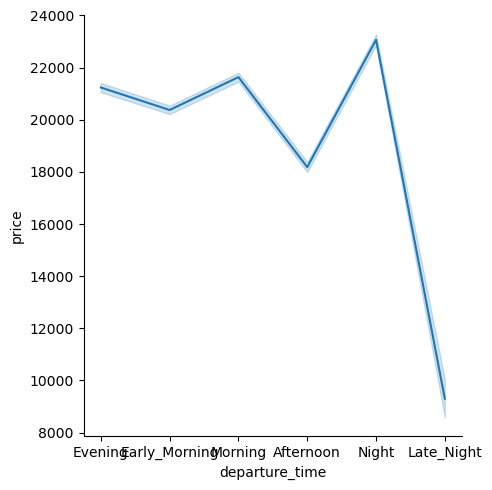

In [48]:
# departure_time
sns.relplot(
    data=df, kind="line",
    x="departure_time", y="price"
)

<Axes: xlabel='departure_time', ylabel='price'>

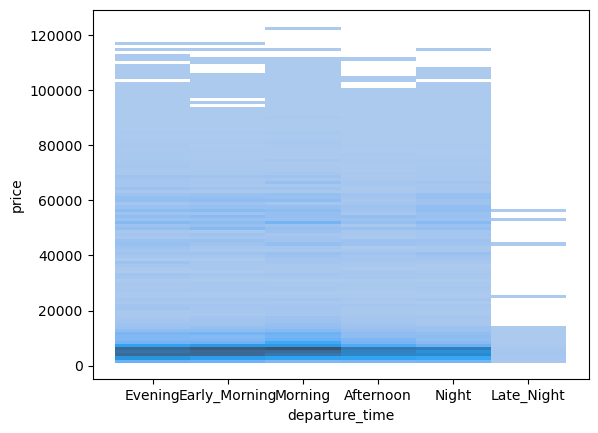

In [49]:
sns.histplot(data=df, x="departure_time",y="price")


### Q8: Does ticket price change based on the duration?

<Axes: xlabel='duration'>

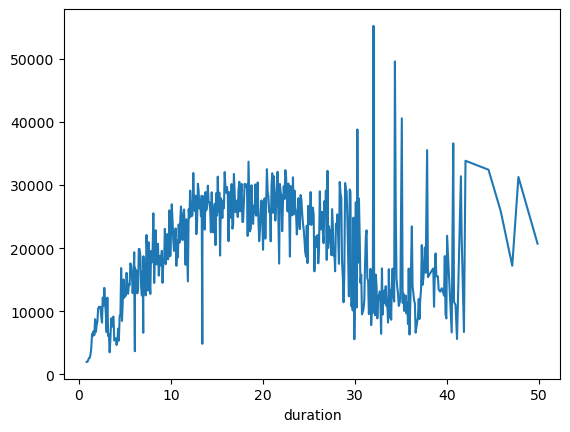

In [50]:
df.groupby("duration")['price'].mean().plot()

```duration``` is not affect prices

# Conclustion 

feature vary preice:

    -class
    -stop
    -Source and destination
    